In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
t = pd.read_csv('transactions.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (2,7,56,57,58,59,60,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Which issuer paid the highest sum of fees?

In [131]:
df_sum = t.groupby(['issuer','LedgerIndex','currency']).Fee.sum().to_frame().reset_index()

In [132]:
data_sum = df_sum[df_sum['Fee'] == df_sum.Fee.max()]
data_sum

,issuer,LedgerIndex,currency,Fee
957,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B,27722875,BTC,280000


In [133]:
data_sum.shape[0]

1

### The issuer 'rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B' has paid the most important amount of fees compared to other issuers. Let's learn about their transactions.

In [137]:
ledger_max = data_sum.LedgerIndex.to_string(index=False)
Fee_max = data_sum.Fee.to_string(index=False)
issuer_max_fee = data_sum.issuer.to_string(index=False)
currency = data_sum.currency.to_string(index=False)
print('The issuer corresponding to that transaction is' + issuer_max_fee)
print('The sum of the fees is' + Fee_max)
print('The currency used is' + currency)
print('Ledger is' + ledger_max)

The issuer corresponding to that transaction is rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B
The sum of the fees is 280000
The currency used is BTC
Ledger is 27722875


## Which issuer paid the highest means of fees?

In [142]:
df_means = t.groupby(['issuer','LedgerIndex','currency']).Fee.mean().to_frame().reset_index()

In [143]:
data_means = df_means[df_means['Fee'] == df_means.Fee.max()].reset_index(drop=True)
data_means

,issuer,LedgerIndex,currency,Fee
0,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B,27720993,BTC,120000.0
1,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B,27722330,BTC,120000.0


In [144]:
def is_unique_issuer(data_means):
 
    if data_means.shape[0] == 1:
        return True

    if data_means.shape[0] > 1:
        k = 0
        for i in range(len(data_means)-1):
            if data_means.loc[:,'issuer'][i] != data_means.loc[:,'issuer'][i+1]:  
                k += 1
        return k

In [147]:
def highest_means_fees(data_means):
    if is_unique_issuer(data_means):
        issuer_max_fee = data_means.issuer.to_string(index=False)
        Fee_max = data_means.Fee.to_string(index=False)
        ledger_max = data_means.LedgerIndex.to_string(index=False)
        currency = data_sum.currency.to_string(index=False)
        print('The issuer corresponding to that transaction is ' + issuer_max_fee)
        print('The sum of the fees is ' + Fee_max)
        print('The currency used is' + currency)
        print('Ledger is ' + ledger_max)
        return
    elif is_unique_issuer(data_means) == 0:
        issuer_max_fee = data_means.loc[:,'issuer'][0]
        Fee_max = data_means.loc[:,'Fee'][0]
        print('The issuer corresponding to that transaction is ' + issuer_max_fee)
        print('The sum of the fees is ' + str(Fee_max))
        for i in range (len(data_means.loc[:,'LedgerIndex'])):
            print('Ledger ' + str(i+1) + ' is ' + str(data_means.loc[:,'LedgerIndex'][i]) + 'in currency ' + 
                  str(data_means.loc[:,'currency'][i]))
        return

In [148]:
highest_means_fees(data_means)

The issuer corresponding to that transaction is rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B
The sum of the fees is 120000.0
Ledger 1 is 27720993in currency BTC
Ledger 2 is 27722330in currency BTC


# Now we want to get the average of fees per ledger that are above the threshold
#### A ledger closes every 4 sec

In [122]:
import pandas as pd
import requests
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
# website: https://xrpl.org/data-api.html#get-transaction
#url = 'https://data.ripple.com/v2/transactions/03EDF724397D2DEE70E49D512AECD619E9EA536BE6CFD48ED167AE2596055C9A'
# limit = nb of days
#res = requests.get('https://data.ripple.com/v2/transactions?start=2020-02-25')
res = requests.get('https://data.ripple.com/v2/transactions?start=2020-02-15&end=2020-02-16&limit=10000')
#res = requests.get(url)
cost = pd.DataFrame(res.json()['transactions'])
cost.head(3)

#cost.to_csv("test.csv",index=False,sep=',')


,hash,ledger_index,date,ledger_hash,tx,meta
0,B42D1B34398FF9A026FD3B456506B12B35E83C9D1B0D84...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,"{'TransactionType': 'Payment', 'Flags': 214748...","{'TransactionIndex': 0, 'AffectedNodes': [{'Mo..."
1,9BE724A0385F3C30FD96FDBA420524E00F3F36ACFFB9B7...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,"{'TransactionType': 'Payment', 'Flags': 214748...","{'TransactionIndex': 1, 'AffectedNodes': [{'Mo..."
2,44F875DEEE3CD61E4EF77365DD9C39115C09D574CB993B...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,"{'TransactionType': 'OfferCreate', 'Flags': 0,...","{'TransactionIndex': 2, 'AffectedNodes': [{'Cr..."


In [141]:
cost["tx"][0]
cost["tx"][15]

{'TransactionType': 'Payment',
 'Flags': 2147483648,
 'Sequence': 1142,
 'LastLedgerSequence': 53436735,
 'Amount': '187',
 'Fee': '12',
 'SigningPubKey': '02575F42843E11CE4340DD4ECA7CD55033D66F9F27DE55F88F0C63D24CEAA2E54F',
 'TxnSignature': '3045022100B0CD81B27D9ED7FFD86D32970F383A49BDAF429DF33B9537C5AFE0E432A06DBE022007E1017009CB6ADA7CF112D1A9E5101113F0779E25E3A6DF03171D9B1B798CC4',
 'Account': 'rQp5VErJhB1RMsQaew1UBypKXYWhhfnBKb',
 'Destination': 'riy2V9jj6rCHJdwDnNmXfmgeyCoKmqfY9',
 'Memos': [{'Memo': {'MemoType': '',
    'MemoData': '5374617274696E67204665627275617279203173742C20323032302C20526970706C652069732072656C656173696E6720332042696C6C696F6E2058525020746F20696E63656E746976697365206E6574776F726B2075736572732E2047657420323525206D6F72652058525020616464656420746F20796F7572206163636F756E742062616C616E636520696E206A757374206D696E757465732E2068747470733A2F2F7777772E676574726970706C652E6F7267'}}]}

In [152]:
from pandas.io.json import json_normalize
df = json_normalize(cost['tx'])
df.columns
#df[['TakerPays.currency','Fee']]

Index(['TransactionType', 'Flags', 'Sequence', 'LastLedgerSequence', 'Amount',
       'Fee', 'SigningPubKey', 'TxnSignature', 'Account', 'Destination',
       'Memos', 'OfferSequence', 'TakerPays', 'TakerGets.value',
       'TakerGets.currency', 'TakerGets.issuer', 'TakerGets',
       'TakerPays.value', 'TakerPays.currency', 'TakerPays.issuer', 'SendMax',
       'Paths', 'Amount.value', 'Amount.currency', 'Amount.issuer',
       'DestinationTag', 'Expiration'],
      dtype='object')

In [153]:
df = df[['TransactionType','TakerGets.issuer','TakerGets.currency',
     'TakerPays.issuer', 'TakerPays.currency',
     'Fee','Account']]

In [155]:
m1 = df['TakerGets.currency'].isna()
m2 = df['TakerPays.currency'].isna()

df['currency'] = np.select([m1, m2, m1 & m2], 
                        [df['TakerPays.currency'], df['TakerGets.currency'], np.nan], 
                        default=df['TakerGets.currency'] + '_' + df['TakerPays.currency'])

n1 = df['TakerGets.issuer'].isna()
n2 = df['TakerPays.issuer'].isna()

df['issuer'] = np.select([n1, n2, n1 & n2], 
                        [df['TakerPays.issuer'], df['TakerGets.issuer'], np.nan], 
                        default=df['TakerGets.issuer'] + '_' + df['TakerPays.issuer'])


del df['TakerGets.currency']
del df['TakerPays.currency']
del df['TakerGets.issuer']
del df['TakerPays.issuer']

df_ = df

In [156]:
#result = pd.concat([df1, df4], axis=1, join='inner')
df = pd.concat([cost, df_], axis=1)
del df['tx']
del df['meta']
df["Fee"] = df.Fee.astype(float)

In [157]:
df.head()

,hash,ledger_index,date,ledger_hash,TransactionType,Fee,Account,currency,issuer
0,B42D1B34398FF9A026FD3B456506B12B35E83C9D1B0D84...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,Payment,12.0,rBPT9mEAWnUxJfUcpcTp4bTkUQprZ6CkQp,NaN,NaN
1,9BE724A0385F3C30FD96FDBA420524E00F3F36ACFFB9B7...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,Payment,12.0,rB4r5x3RhpYe2Wx8DddoBrnnBPgcdYfBwS,NaN,NaN
2,44F875DEEE3CD61E4EF77365DD9C39115C09D574CB993B...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,OfferCreate,12.0,rwchA2b36zu2r6CJfEMzPLQ1cmciKFcw9t,CNY,rJ1adrpGS3xsnQMb9Cw54tWJVFPuSdZHK
3,6E571E2D856353445C321E9A37753F80420FDFB176C2D6...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,OfferCreate,12.0,rwchA2b36zu2r6CJfEMzPLQ1cmciKFcw9t,CNY,rJ1adrpGS3xsnQMb9Cw54tWJVFPuSdZHK
4,CB2066047769FA8329F6FA0FD8F88B06AFD8EDC7461A23...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,OfferCreate,12.0,rwchA2b36zu2r6CJfEMzPLQ1cmciKFcw9t,CNY,rJ1adrpGS3xsnQMb9Cw54tWJVFPuSdZHK


In [160]:
df_means_fee = df.groupby('ledger_index').Fee.mean().to_frame().reset_index()
df_means_fee

,ledger_index,Fee
0,53436733,16.382979
1,53436734,11.842105
2,53436735,11.600000


Text(0.5, 1.0, 'Proportion of Fee means per ledger')

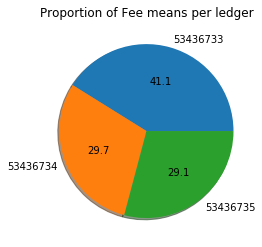

In [166]:
# plot it 
ledger = fee_mean['ledger_index']
plt.pie(fee_mean['Fee'], labels=ledger, autopct='%.01f', shadow=True)
plt.title('Proportion of Fee means per ledger')

In [168]:
df[df['Fee']> 50]

,hash,ledger_index,date,ledger_hash,TransactionType,Fee,Account,currency,issuer
40,7C4EE400B3470C5FD194922CAE9FA14B1F64DCDFF02775...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,Payment,102.0,rwZiRAZz2d3arorLk3uqWULxGKyo5F2n8L,NaN,NaN
45,661FC3DC161F3BC604E8B93742D277BB59419EA891A146...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,Payment,132.0,rEsCYHcMpr5M4Knd9iPWF8oUaHkMEZ1r3a,NaN,NaN


# Try Ravi's code for the slackbot

In [169]:
def check_tx_count_great200():
    url='https://data.ripple.com/v2/transactions/'+ datetime.now().strftime('%Y-%m-%dT%H:%M:%SZ')
    #ledger_identifier=2020-01-22T11:20:00Z\
    resmain = requests.get(url)
    x = resmain.json()['transactions']
    if (int(cost['tx']['fee'])>100):
        return True, x
    else:
        return False, x

In [176]:
res = requests.get('https://data.ripple.com/v2/transactions?start=2020-02-15&end=2020-02-16&limit=10000')
#res = requests.get(url)
cost = pd.DataFrame(res.json()['transactions'])
cost.head(3)

,hash,ledger_index,date,ledger_hash,tx,meta
0,B42D1B34398FF9A026FD3B456506B12B35E83C9D1B0D84...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,"{'TransactionType': 'Payment', 'Flags': 214748...","{'TransactionIndex': 0, 'AffectedNodes': [{'Mo..."
1,9BE724A0385F3C30FD96FDBA420524E00F3F36ACFFB9B7...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,"{'TransactionType': 'Payment', 'Flags': 214748...","{'TransactionIndex': 1, 'AffectedNodes': [{'Mo..."
2,44F875DEEE3CD61E4EF77365DD9C39115C09D574CB993B...,53436733,2020-02-15T00:00:00+00:00,FC07B4B80AED1743DDAE1B5205B60D3536FA95C47266B4...,"{'TransactionType': 'OfferCreate', 'Flags': 0,...","{'TransactionIndex': 2, 'AffectedNodes': [{'Cr..."


In [175]:
import time
from datetime import datetime
url='https://data.ripple.com/v2/transactions/'+ datetime.now().strftime('%Y-%m-%dT%H:%M:%SZ')
    #ledger_identifier=2020-01-22T11:20:00Z\
resmain = requests.get(url)
x = pd.DataFrame(resmain.json()['transactions'])
print(x)

KeyError: 'transactions'